<!--BOOK_INFORMATION-->
<a href="https://www.packtpub.com/big-data-and-business-intelligence/machine-learning-opencv" target="_blank"><img align="left" src="data/cover.jpg" style="width: 76px; height: 100px; background: white; padding: 1px; border: 1px solid black; margin-right:10px;"></a>
*This notebook contains an excerpt from the upcoming book [Machine Learning for OpenCV](https://www.packtpub.com/big-data-and-business-intelligence/machine-learning-opencv) by Michael Beyeler (expected Aug 2017).
The code is released under the [MIT license](https://opensource.org/licenses/MIT),
and is available on [GitHub](https://github.com/mbeyeler/opencv-machine-learning).*

*Note that this excerpt contains only the raw code - the book is rich with additional explanations and illustrations.
If you find this content useful, please consider supporting the work by
[buying the book](https://github.com/mbeyeler/opencv-machine-learning)!*

<!--NAVIGATION-->
< [Dealing with Data Using OpenCV's TrainData Container in C++](02.05-Dealing-with-Data-Using-the-OpenCV-TrainData-Container-in-C++.ipynb) | [Contents](../README.md) | [The k-Nearest Neighbor Classifier](03.01-The-k-Nearest-Neighbor-Algorithm.ipynb) >

## Scoring classifiers using accuracy, precision, and recall

In a binary classification task, where there are only two different class labels, there are a number of different ways to measure classification performance. Some common metrics are:

- `accuracy_score`: *Accuracy* counts the number of data points in the test set that have been predicted correctly, and returns that number as a fraction of the test set size. Sticking to the example of classifying pictures as cats or dogs, accuracy indicates the fraction of pictures that have been correctly classified as containing either a cat or a dog. This is the most basic scoring function for classifiers.
- `precision_score`: *Precision* describes the ability of a classifier not to label as "cat" a picture that contains a dog. In other words, out of all the pictures in the test set that the classifier thinks contain a cat, precision is the fraction of pictures that actually contain a cat.
- `recall_score`: *Recall* (or *sensitivity*) describes the ability of a classifier to retrieve all the pictures that contain a cat. In other words, out of all the pictures of cats in the test set, recall is the fraction of pictures that have been correctly identified as pictures of cats.

Import NumPy and pick a seed for the random number generator:

In [1]:
import numpy as np

In [2]:
np.random.seed(42)

Generate five random labels that are either zeros or ones by picking random integers in the range [0, 2):

In [3]:
y_true = np.random.randint(0, 2, size=5)
y_true

array([0, 1, 0, 0, 0])

Not the smartest classifier: always predicting class 1:

In [4]:
y_pred = np.ones(5, dtype=np.int32)
y_pred

array([1, 1, 1, 1, 1])

A naive implementation of an accuracy metric might sum up all occurrences where the predicted class label matched the true class label:

In [5]:
np.sum(y_true == y_pred) / len(y_true)

0.20000000000000001

A smarter - and more convenient - implementation is provided by Scikit-Learn's `metrics` module:

In [6]:
from sklearn import metrics

In [7]:
metrics.accuracy_score(y_true, y_pred)

0.20000000000000001

Counting true positives:

In [8]:
truly_a_positive = (y_true == 1)

In [9]:
predicted_a_positive = (y_pred == 1)

In [10]:
# You thought it was a 1, and it actually was a 1
true_positive = np.sum(predicted_a_positive * truly_a_positive)
true_positive

1

In [11]:
# You thought it was a 1, but it was actually a 0
false_positive = np.sum((y_pred == 1) * (y_true == 0))
false_positive

4

Counting false negatives:

In [12]:
# You thought it was a 0, but it actually was a 1
false_negative = np.sum((y_pred == 0) * (y_true == 1))
false_negative

0

Counting true negatives:

In [13]:
# You thought it was a 0, and it actually was a 0
true_negative = (y_pred == 0) * (y_true == 0)
true_negative

array([False, False, False, False, False], dtype=bool)

Accuracy as a function of true positives and true negatives:

In [14]:
accuracy = np.sum(true_positive + true_negative) / len(y_true)
accuracy

1.0

Precision as a function of true positives and true negatives:

In [15]:
precision = np.sum(true_positive) / np.sum(true_positive + true_negative)
precision

0.20000000000000001

The same using Scikit-Learn:

In [16]:
metrics.precision_score(y_true, y_pred)

0.20000000000000001

In [17]:
recall = true_positive / (true_positive + false_negative)
recall

1.0

In [18]:
metrics.recall_score(y_true, y_pred)

1.0

## Scoring regressors using mean squared error, fraction of variance unexplained, and the coefficient of determination

When it comes to regression models, our metrics above don't work anymore. After all, we are now predicting continuous output values, not distinct classification labels. Fortunately, Scikit-Learn provides some other useful scoring functions:

- `mean_squared_error`: The most commonly used error metric for regression problems is simply to measure the *squared error* between predicted and true target value for every data point in the training set, averaged across all data points.
- `explained_variance_score`: A more sophisticated metric is to measure to what degree a model can explain the variation or dispersion of the test data. Often, the amount of *explained variance* is measured using the *correlation coefficient*.
- `r2_score`: The R2 score (pronounced *R squared*) is closely related to the explained variance score, but uses an unbiased variance estimation. It is also known as the *coefficient of determination*.

A sine wave plus noise:

In [19]:
x = np.linspace(0, 10, 100)

In [20]:
y_true = np.sin(x) + np.random.rand(x.size) - 0.5

Predictions do not include noise:

In [21]:
y_pred = np.sin(x)

Visualizing the data:

In [22]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

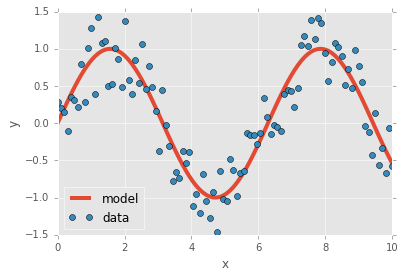

In [23]:
plt.plot(x, y_pred, linewidth=4, label='model')
plt.plot(x, y_true, 'o', label='data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='lower left')

Calculating the mean squared error:

In [24]:
mse = np.mean((y_true - y_pred) ** 2)
mse

0.085318394808423778

In [25]:
metrics.mean_squared_error(y_true, y_pred)

0.085318394808423778

Fraction of variance unexplained:

In [26]:
fvu = np.var(y_true - y_pred) / np.var(y_true)
fvu

0.16397032626629501

Fraction of variance explained:

In [27]:
fve = 1.0 - fvu
fve

0.83602967373370496

The same with Scikit-Learn:

In [28]:
metrics.explained_variance_score(y_true, y_pred)

0.83602967373370496

Coefficient of determination:

In [29]:
r2 = 1.0 - mse / np.var(y_true)
r2

0.8358169419264746

The same with Scikit-Learn:

In [30]:
metrics.r2_score(y_true, y_pred)

0.8358169419264746

Comparing that to a classifier that always predicts 0:

In [31]:
metrics.r2_score(y_true, np.mean(y_true) * np.ones_like(y_true))

0.0

<!--NAVIGATION-->
< [Dealing with Data Using OpenCV's TrainData Container in C++](02.05-Dealing-with-Data-Using-the-OpenCV-TrainData-Container-in-C++.ipynb) | [Contents](../README.md) | [The k-Nearest Neighbor Classifier](03.01-The-k-Nearest-Neighbor-Algorithm.ipynb) >